# Projeto 1
## BIF0261 - Aprendizado de máquina aplicado a dados biológicos

Neste projeto, vocês vão lidar com dados *Leptospira*, um gênero bacteriano causador da leptospirose. Particularmente neste gênero, as suas espécies são classificadas não apenas através da taxonomia, mas também pela similaridade antigênica em diferentes sorogrupos e sorovares. Esta classificação é importante para direcionar o tratamento e as medidas profiláticas por meio de vacinas. Apesar da importância da classificação sorológica, a sua realização ocorre por métodos laboriosos que requerem dias para a obtenção de resultados. Dessa forma, é de grande interesse pode empregar métodos de biologia molecular para auxiliar na classificação sorológicas desta bactéria. 

No entanto, o conhecimento sobre as bases genéticas que regem a sorotipagem neste gênero ainda é limitado, o que dificulta a obtenção de um resultado conclusivo sobre a classificação sorológica das linhagens amostradas. Com o avanço das tecnologias de sequenciamento e a disponibilidade de um grande número de depósitos de sequências genômicas em bancos de dados públicos, esta limitação pode ser superada por meio de análises de aprendizado de máquina. 

A proposta do projeto é utilizar esses dados analisando-as a fim de encontrar as bases genéticas associadas à classificação sorológica. E para isto, vocês vão analisar um arquivo que fornece informações sobre os grupos de ortólogos dos acessos de *Leptospira* disponíveis para a análise. Grupo de ortólogos (OG), pela definição é um conjunto de genes de diferentes espécies que possuem uma mesma origem ancestral. Na prática, tendo esses dados em mãos, se você possui uma proteína de interesse em um dos acessos de *Leptospira* e quer encontrar a proteína correspondente nos outros acessos, basta você consultar o grupo de ortólogo a qual ela pertence, e nesse grupo você encontrará as proteínas correspondentes nos outros acessos de *Leptospira*, ou mesmo verificar se essa proteína foi deletada ou duplicada.

Diante do exposto, pede-se:

* Crie um modelo de aprendizado de máquina para classificar os diferentes sorogrupos de leptospira;
* Encontre os grupos de ortólogos que sejam relevantes para a classificação sorológicas destas leptospiras. 

Nas células a seguir vocês encontrarão códigos que carregam os dados necessários para a realização deste projeto. O que vocês vão precisar são basicamente são os dados que estão na variável *data* e dos rótulos que estão na variável *label*.

Obs.: Este projeto é inédito, então possui um grande potencial de ser apresentado para a comunidade científica na forma de resumo ou artigo, caso encontre resultados interessantes. Estes dados também não foram ainda analisados previamente, por isso não possuo conhecimento se irão conseguir chegar a bons resultados. Então, testem o que estiverem aos seus alcances para atingir aos objetivos do projeto.

In [2]:
import pandas as pd
import numpy as np

In [3]:
# pasta onde você pode encontrar os arquivos
folder = "http://hungria.imd.ufrn.br/~tetsu/leptospira/ML/"

In [4]:
# Dados sobre o sorogrupos das cepas de Leptospira
# Na variável "sero", você encontrará o sorogrupo na qual cada acesso de Leptospira faz parte
sero = pd.read_csv(folder+"leptospira_serogroup.tab", sep="\t")
sero = sero.sort_values("accession")
sero

,accession,serogroup
148,GCF_000007685.1,Icterohaemorrhagiae
344,GCF_000013945.1,Sejroe
707,GCF_000013965.1,Sejroe
354,GCF_000017605.1,Semaranga
355,GCF_000017685.1,Semaranga
...,...,...
720,GCF_015318565.1,Pomona
17,GCF_015318575.1,Ballum
702,GCF_015318635.1,Sejroe
516,GCF_900156205.1,Unknown


In [5]:
# acessos selecionados para fazer parte dos dados
# Na variável "accession", você encontrará os acessos selecionados para realizar as análises.
# Estas foram selecionados de tal forma que:
# - acessos classificados em sorogrupos pouco frequente foram eliminados;
# - acessos classificados em sorogrupos muito frequente (Ballum e Icterohaemorrhagiae) foram 
# selecionados randomicamente;
# As linhas estão ordenadas pelo acesso.
accession = pd.read_csv(folder+"leptospira_accession_train_sel.tab", sep="\t", header=None)
accession = accession.sort_values(0)
accession.head()

,0
27,GCF_000216175.2
67,GCF_000216355.1
8,GCF_000216375.1
202,GCF_000216515.1
215,GCF_000216595.2


In [6]:
# rótulos para cada acesso selecionado
# Na variável "label", você tem uma série dos sorogrupos a qual os acessos selecionados pertencem.
# A ordem das dos sorogrupos que aparece em "label" corresponde a ordem dos acessos em "accession".
label = sero[sero["accession"].isin(accession[0])]
label = label["serogroup"]
label

100               Canicola
289                 Pomona
10              Autumnalis
207    Icterohaemorrhagiae
203    Icterohaemorrhagiae
              ...         
281                 Pomona
282                 Pomona
324                 Sejroe
17                  Ballum
302              Pyrogenes
Name: serogroup, Length: 218, dtype: object

In [7]:
np.unique(label)

array(['Australis', 'Autumnalis', 'Ballum', 'Bataviae', 'Canicola',
       'Grippotyphosa', 'Icterohaemorrhagiae', 'Javanica', 'Pomona',
       'Pyrogenes', 'Sejroe', 'Tarassovi'], dtype=object)

In [8]:
# carregando o arquivo de dados de genes ortólogos
# Na variável data, você encontrará, para cada acesso de Leptospira, os dados sobre a quantidade de
# genes presentes em cada grupo de ortólogos.
# As linhas estão ordenadas pelo acesso.
data = pd.read_csv(folder+"Orthogroups_1.GeneCount.csv", sep="\t", index_col=0)
data = data[accession[0]]
data = data.transpose()
data

,OG0000000,OG0000001,OG0000002,OG0000003,OG0000004,OG0000005,OG0000006,OG0000007,OG0000008,OG0000009,...,OG0013926,OG0013927,OG0013928,OG0013929,OG0013930,OG0013931,OG0013932,OG0013933,OG0013934,OG0013935
GCF_000216175.2,12,16,8,12,3,7,6,8,3,3,...,0,0,0,0,0,0,0,0,0,0
GCF_000216355.1,13,9,8,11,4,7,7,23,0,4,...,0,0,0,0,0,0,0,0,0,0
GCF_000216375.1,12,14,9,10,4,9,6,13,6,4,...,0,0,0,0,0,0,0,0,0,0
GCF_000216515.1,10,11,7,7,4,5,7,2,10,4,...,0,0,0,0,0,0,0,0,0,0
GCF_000216595.2,18,10,6,6,4,6,7,1,8,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCF_015318485.1,13,11,8,10,4,7,7,11,0,4,...,0,0,0,0,0,1,1,0,0,1
GCF_015318515.1,13,11,8,10,4,8,7,10,1,4,...,0,0,0,0,1,0,0,0,0,0
GCF_015318545.1,8,3,5,2,5,0,1,8,0,3,...,0,0,0,0,0,0,0,0,0,0
GCF_015318575.1,7,5,4,3,5,0,1,4,0,4,...,0,1,0,0,0,0,0,1,1,0


In [9]:
data.describe()

,OG0000000,OG0000001,OG0000002,OG0000003,OG0000004,OG0000005,OG0000006,OG0000007,OG0000008,OG0000009,...,OG0013926,OG0013927,OG0013928,OG0013929,OG0013930,OG0013931,OG0013932,OG0013933,OG0013934,OG0013935
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,...,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,10.577982,9.399083,6.486239,6.545872,4.596330,4.555046,4.788991,5.646789,3.807339,3.931193,...,0.004587,0.009174,0.009174,0.009174,0.009174,0.009174,0.009174,0.009174,0.009174,0.004587
std,3.920391,4.622266,1.906161,3.873603,0.896684,3.329687,2.835175,5.031606,3.951263,0.525690,...,0.067729,0.095562,0.095562,0.095562,0.095562,0.095562,0.095562,0.095562,0.095562,0.067729
min,2.000000,1.000000,2.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,6.000000,4.000000,2.000000,4.000000,0.000000,1.000000,3.000000,0.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11.000000,10.000000,7.000000,7.000000,4.000000,6.000000,7.000000,4.000000,3.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,13.000000,13.000000,8.000000,10.000000,5.000000,7.000000,7.000000,8.000000,7.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,18.000000,22.000000,11.000000,15.000000,10.000000,11.000000,8.000000,28.000000,15.000000,6.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(data,label,test_size=0.3)

# Seleção de variáveis

### Mutual information
Relação entre as variaveis e a variavel target

In [11]:
from sklearn.feature_selection import mutual_info_classif 

mi = mutual_info_classif(X_train, y_train)
mi

array([0.68834128, 1.07532701, 0.69209515, ..., 0.        , 0.        ,
       0.        ])

In [12]:
mi = pd.Series(mi)
mi.index = X_train.columns
mi = mi.sort_values(ascending = False)

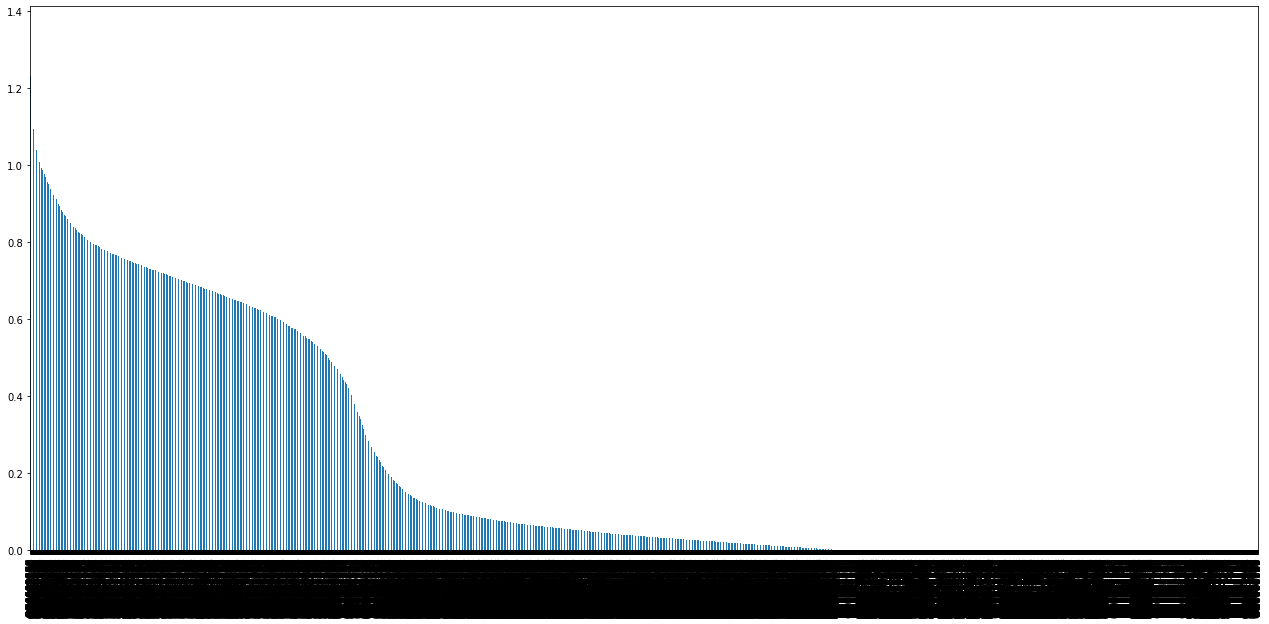

In [13]:
mi.plot.bar(figsize=(22,10))

In [14]:
from sklearn.feature_selection import SelectKBest

sel_ = SelectKBest(mutual_info_classif, k=20).fit(X_train, y_train)
X_train.columns[sel_.get_support()]

Index(['OG0000035', 'OG0000040', 'OG0000063', 'OG0000071', 'OG0000084',
       'OG0000096', 'OG0000101', 'OG0000104', 'OG0000109', 'OG0000116',
       'OG0000145', 'OG0000164', 'OG0000189', 'OG0000219', 'OG0002511',
       'OG0002764', 'OG0002835', 'OG0002959', 'OG0002976', 'OG0002978'],
      dtype='object')

In [15]:
sel_columns = list(X_train.columns[sel_.get_support()])
sel_columns

['OG0000035',
 'OG0000040',
 'OG0000063',
 'OG0000071',
 'OG0000084',
 'OG0000096',
 'OG0000101',
 'OG0000104',
 'OG0000109',
 'OG0000116',
 'OG0000145',
 'OG0000164',
 'OG0000189',
 'OG0000219',
 'OG0002511',
 'OG0002764',
 'OG0002835',
 'OG0002959',
 'OG0002976',
 'OG0002978']

In [16]:
selection_data = data[sel_columns]
selection_data

,OG0000035,OG0000040,OG0000063,OG0000071,OG0000084,OG0000096,OG0000101,OG0000104,OG0000109,OG0000116,OG0000145,OG0000164,OG0000189,OG0000219,OG0002511,OG0002764,OG0002835,OG0002959,OG0002976,OG0002978
GCF_000216175.2,1,2,2,1,2,2,1,1,2,2,1,2,1,1,1,1,1,1,1,1
GCF_000216355.1,2,3,1,1,2,2,1,1,2,2,1,2,1,1,1,1,1,1,1,1
GCF_000216375.1,2,3,2,1,2,2,1,1,2,2,1,2,1,1,1,1,1,1,1,1
GCF_000216515.1,2,3,2,2,1,2,1,1,2,2,1,1,1,1,1,1,1,1,1,1
GCF_000216595.2,2,3,2,2,1,2,1,1,2,2,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCF_015318485.1,2,3,2,1,2,2,1,1,2,2,1,2,1,1,1,1,1,1,1,1
GCF_015318515.1,2,3,2,1,2,2,1,2,2,2,1,2,1,1,1,1,1,1,1,1
GCF_015318545.1,2,1,1,2,2,0,2,2,0,1,2,1,0,1,1,1,1,0,0,0
GCF_015318575.1,1,4,1,2,1,1,1,1,1,0,2,1,2,2,0,0,0,1,1,1


# SVM

O SVM é um algoritmo que busca uma linha de separação entre duas classes distintas analisando os dois pontos, 
um de cada grupo, mais próximos da outra classe.

In [17]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier

In [18]:
X_train,X_test,y_train,y_test = train_test_split(selection_data,label,test_size=0.3)

model = LinearSVC(max_iter=9999)
model.fit(X_train, y_train)
predict = model.predict(X_test)

accuracy_score(y_test, predict)

0.8484848484848485

In [19]:
dummy_stratified = DummyClassifier(strategy='prior')
dummy_stratified.fit(X_train, y_train)

dummy_stratified.score(X_test, y_test)

0.15151515151515152